In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv('test.csv')

In [3]:
df_test.shape

(418, 11)

In [4]:
df_train.info()  #there are nan values in cabin and age column which we have to sort out later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df_test.info() #this donot have survived column which we have to test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
import seaborn as sns
sns.set()

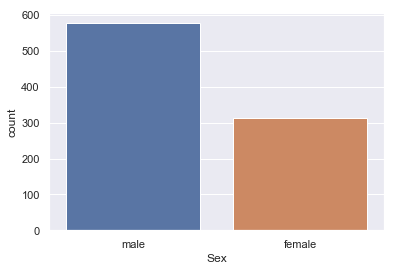

In [7]:
sns.countplot(df_train['Sex'])

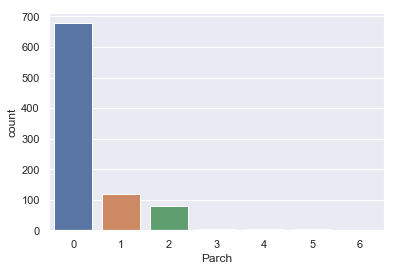

In [8]:
sns.countplot(df_train['Parch'])

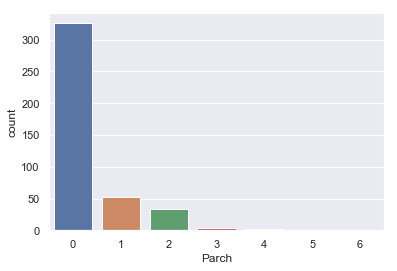

In [9]:
sns.countplot(df_test['Parch'])

#HERE WE SEE parch HAS more COLUMNS in TEST data which will become a problem in our dataset later


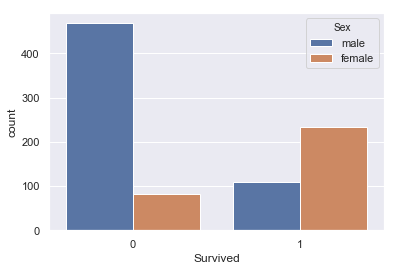

In [10]:
sns.countplot(df_train['Survived'], hue='Sex', data = df_train)  #more males are dead than females

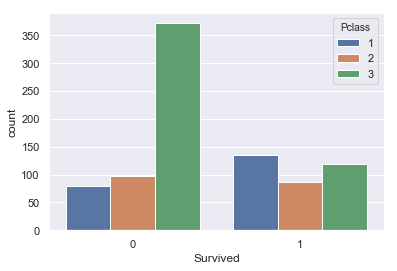

In [11]:
sns.countplot(df_train['Survived'], hue= 'Pclass', data= df_train) #pclass is ticket class

#by this graph we see that more people survived from 1st class ticket 

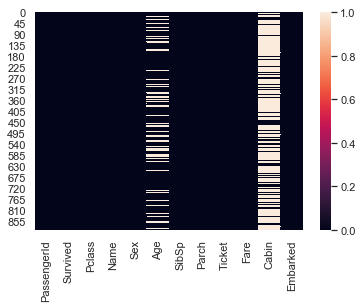

In [12]:
sns.heatmap((df_train.isnull()) )

#here in this heatmap we see that there are missing values in age and cabin
#and we have to remove that

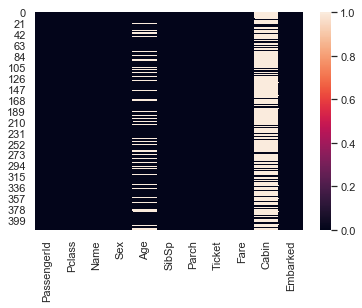

In [13]:
sns.heatmap((df_test.isnull()) )
#in test graph too

In [14]:
age = df_train['Age']

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


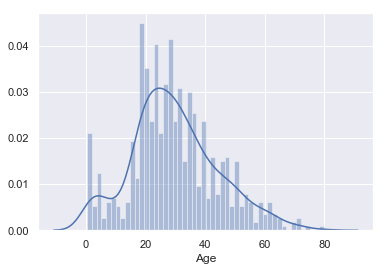

In [15]:
sns.distplot(age.dropna(), bins=50)

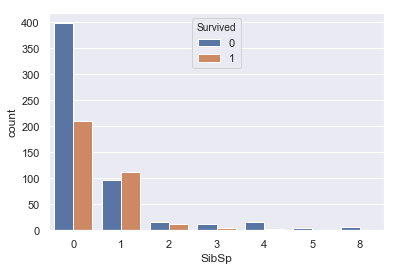

In [16]:
sns.countplot(df_train['SibSp'], data=df_train, hue='Survived') #number of siblings of spouses

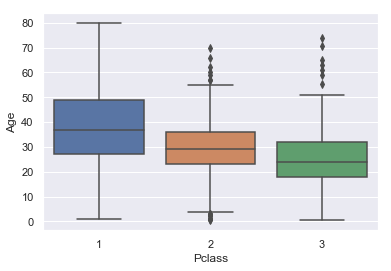

In [17]:
sns.boxplot(data = df_train, y='Age', x= 'Pclass')

#here in boxplot we can see the mean age survived according to each class
#so mean age of class 1 is approx 37
#                     2           29
#                     3           24

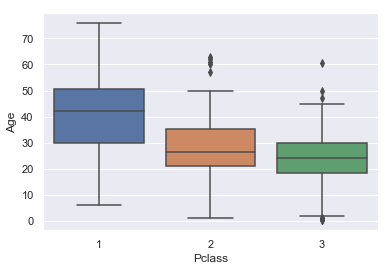

In [18]:
sns.boxplot(data = df_test, y='Age', x= 'Pclass')



In [19]:
#Function To Replace Nan Age by The Mean According to Pclass
#AS WE HAVE SEEN IN THE BOX PLOT ABOVE



def replace (cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 37          #mean from boxplot
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    
    else: 
        return age
    
    

In [20]:
#FROM test box plot


def replace1 (cols):
    age = cols[0]
    Pclass = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 43          #mean from boxplot
        elif Pclass == 2:
            return 26
        elif Pclass == 3:
            return 34
    
    else: 
        return age
    

In [21]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(replace , axis =1)

In [22]:
df_train['Age']

#ie no nan values

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      24.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     29.0
18     31.0
19     24.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     24.0
27     19.0
28     24.0
29     24.0
       ... 
861    21.0
862    48.0
863    24.0
864    24.0
865    42.0
866    27.0
867    31.0
868    24.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    24.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
df_test['Age'] = df_test[['Age', 'Pclass']].apply(replace , axis =1)

#replacing nan values of test values with mean informATIOn from train boxplot

In [24]:
df_test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
5      14.0
6      30.0
7      26.0
8      18.0
9      21.0
10     24.0
11     46.0
12     23.0
13     63.0
14     47.0
15     24.0
16     35.0
17     21.0
18     27.0
19     45.0
20     55.0
21      9.0
22     37.0
23     21.0
24     48.0
25     50.0
26     22.0
27     22.5
28     41.0
29     24.0
       ... 
388    21.0
389     6.0
390    23.0
391    51.0
392    13.0
393    47.0
394    29.0
395    18.0
396    24.0
397    48.0
398    22.0
399    31.0
400    30.0
401    38.0
402    22.0
403    17.0
404    43.0
405    20.0
406    23.0
407    50.0
408    24.0
409     3.0
410    24.0
411    37.0
412    28.0
413    24.0
414    39.0
415    38.5
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [25]:
fare = df_train['Fare']

In [26]:
type(fare)

pandas.core.series.Series

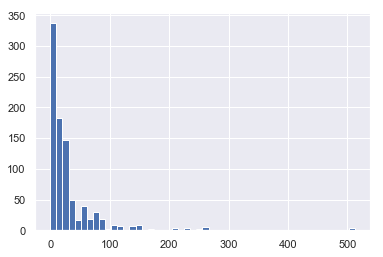

In [27]:
#-------------#GRAPH USING PANDA ONLY------------------
fare.hist(bins=50)
#-------------------------------------------------------------------

In [28]:
#CREATING DUMMY VAR FOR TRAINING DATA

sex1 = df_train['Sex']
sex1 = pd.get_dummies(sex1, drop_first=True )


pclass1 = df_train['Pclass']
pclass1 = pd.get_dummies(pclass1, drop_first=True)
                     

sibsp1 = df_train['SibSp']
sibsp1 = pd.get_dummies(sibsp1, drop_first=True)
                     

parch1 = df_train['Parch']
parch1 = pd.get_dummies(parch1, drop_first=True)
                     

embarked1 = df_train['Embarked']
embarked1 = pd.get_dummies(embarked1, drop_first=True)


age1 = df_train['Age']

In [29]:
#CREATING DUMMY VAR FOR TEST DATA

sex2 = df_test['Sex']
sex2 = pd.get_dummies(sex2, drop_first=True )


pclass2 = df_test['Pclass']
pclass2 = pd.get_dummies(pclass2, drop_first=True)
                     

sibsp2 = df_test['SibSp']
sibsp2 = pd.get_dummies(sibsp2, drop_first=True)
                     

parch2 = df_test['Parch']
parch2 = pd.get_dummies(parch2, drop_first=True)
                     

embarked2 = df_test['Embarked']
embarked2 = pd.get_dummies(embarked2, drop_first=True)

age2 = df_test['Age']

In [30]:
#Survived to be PREDICTED


y= df_train['Survived']

In [31]:
X1 = pd.concat([age1 , embarked1, parch1, sibsp1, pclass1, sex1], axis =1)

In [32]:
X1.head(5) 
#all are converted

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,2,3,male
0,22.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,38.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [33]:
X2 = pd.concat([age2 , embarked2, parch2, sibsp2, pclass2, sex2], axis =1)

In [34]:
X2.head(5)

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,2,3,male
0,34.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,47.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,62.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,22.0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X1,y)   
#here we didnt use train_test_split because we have diff training and testing data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
X2.shape

(418, 18)

In [39]:
Y_pred = model.predict(X2)


In [40]:
df_test['Survived'] = Y_pred   #saving our prdicted data to survived column of test

In [41]:
df_test[['PassengerId', 'Survived']].to_csv('PREDICTED_TITANIC_Survival_DATA_v3.csv', index=False)